# Load libraries and data for Figure 1

In [1]:
from library import *

area_dict, active_area_dict = load_area_dicts(session_ids)
path = './files/adjacency_matrices'
G_ccg_dict, offset_dict, duration_dict = load_graphs(path, active_area_dict, weight=True)
measure = 'ccg'
n = 4
S_ccg_dict = add_sign(G_ccg_dict)
S_ccg_dict = add_offset(S_ccg_dict, offset_dict)
S_ccg_dict = add_duration(S_ccg_dict, duration_dict)
S_ccg_dict = add_delay(S_ccg_dict)
with open('./files/signal_correlation_dict.pkl', 'rb') as f:
  signal_correlation_dict = pickle.load(f)

719161530_spontaneous.npz
719161530_flash_light.npz
719161530_drifting_gratings.npz
719161530_flash_dark.npz
719161530_static_gratings.npz
719161530_natural_scenes.npz
719161530_natural_movie_three.npz
719161530_natural_movie_one.npz
750749662_spontaneous.npz
750749662_natural_movie_three.npz
750749662_flash_light.npz
750749662_drifting_gratings.npz
750749662_natural_movie_one.npz
750749662_natural_scenes.npz
750749662_flash_dark.npz
750749662_static_gratings.npz
754312389_natural_scenes.npz
754312389_natural_movie_three.npz
754312389_static_gratings.npz
754312389_spontaneous.npz
754312389_flash_dark.npz
754312389_flash_light.npz
754312389_drifting_gratings.npz
754312389_natural_movie_one.npz
755434585_spontaneous.npz
755434585_natural_movie_one.npz
755434585_flash_light.npz
755434585_natural_movie_three.npz
755434585_natural_scenes.npz
755434585_drifting_gratings.npz
755434585_flash_dark.npz
755434585_static_gratings.npz
756029989_spontaneous.npz
756029989_drifting_gratings.npz
756029

# Plot Figure 1B

spontaneous
flash_dark
drifting_gratings
static_gratings
natural_scenes
natural_movie_one


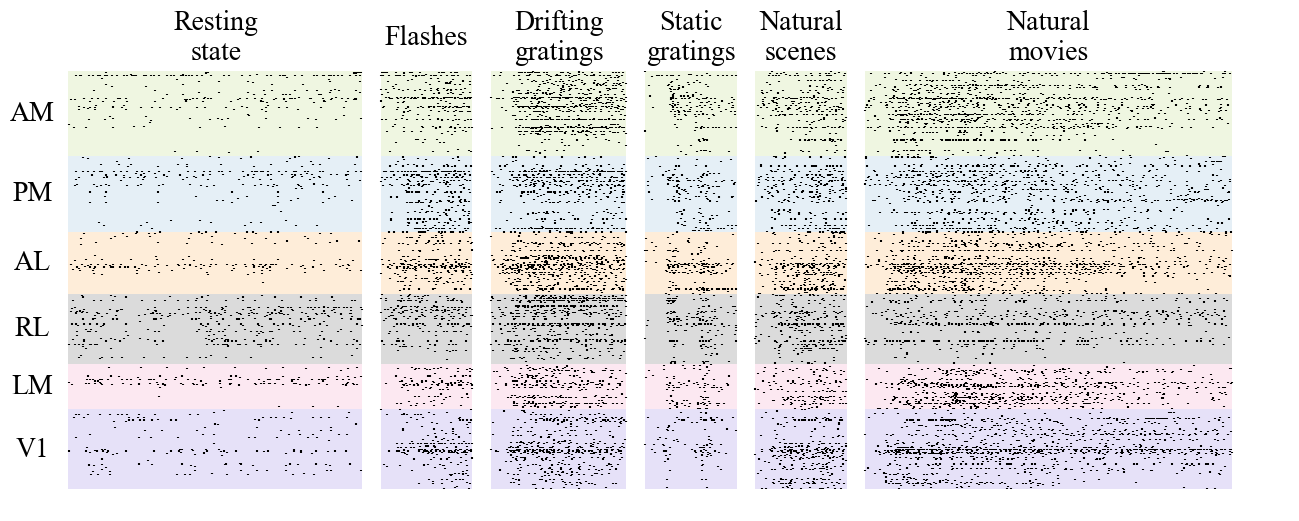

In [2]:
session_index = 1 # select an example session to plot
s_lengths  = [800, 250, 370, 250, 250, 1000] # length of spike trains for each stimulus to plot respectively
blank_width = 50 # add blank space between different stimuli
total_sequence, areas_num, areas_start_pos, sequence_by_area = get_raster_data(area_dict, session_index, s_lengths, blank_width)
plot_raster(total_sequence, areas_num, areas_start_pos, sequence_by_area, s_lengths, blank_width)

# Load data for Figure 1D

In [3]:
session_ind, stimulus_ind = 4, 7 # example session and stimulus to plot
ccg_zscore, ccg_value = get_connectivity_data(G_ccg_dict, session_ind, stimulus_ind)

duration 11


/home/dstang/functional_network_open/library.py:307: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  corr_integral = signal.convolve(corr, filter, mode='valid', method='fft')
/home/dstang/functional_network_open/library.py:308: RuntimeWarning: Mean of empty slice
  mu, sigma = np.nanmean(corr_integral, -1), np.nanstd(corr_integral, -1)
/home/dstang/miniconda3/envs/functional_network/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


duration 10
duration 9
duration 8
duration 7
duration 6
duration 5
duration 4
duration 3
duration 2
duration 1
duration 0


# Plot Figure 1D

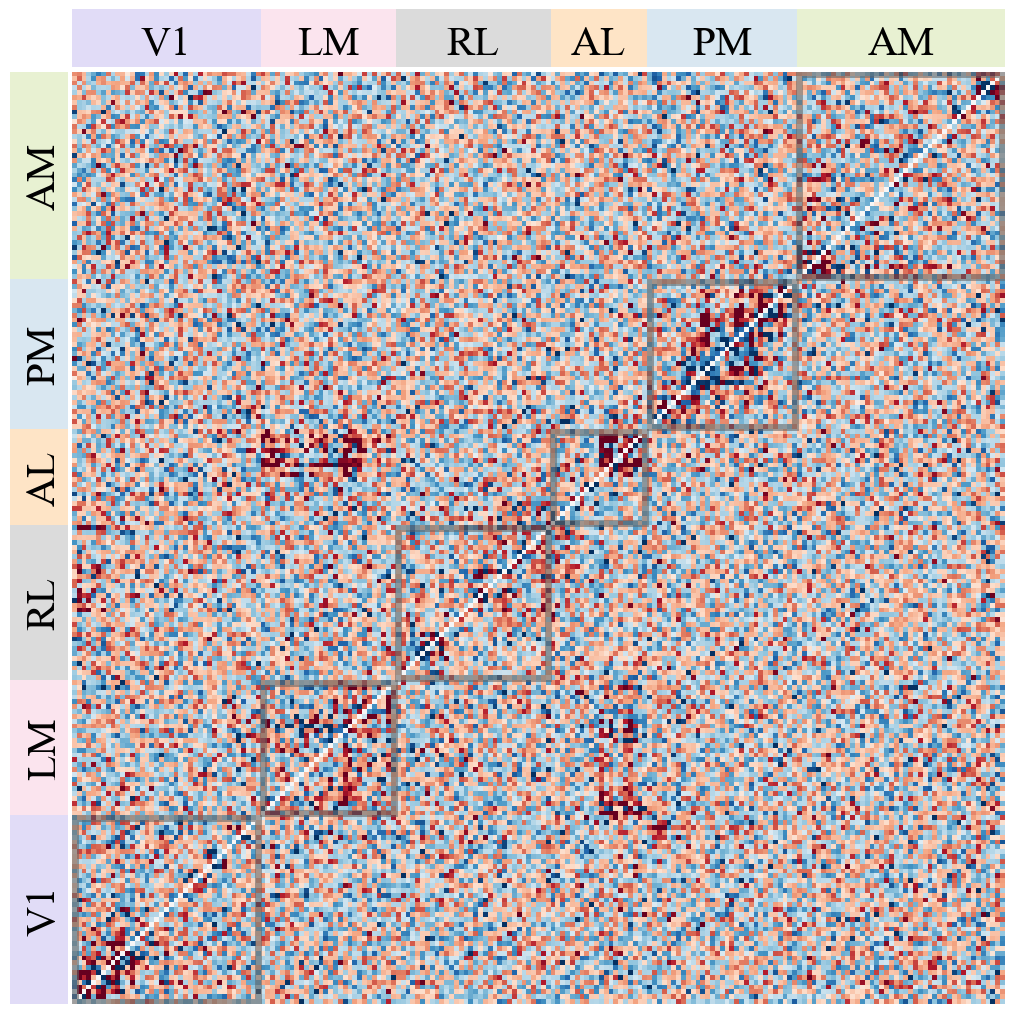

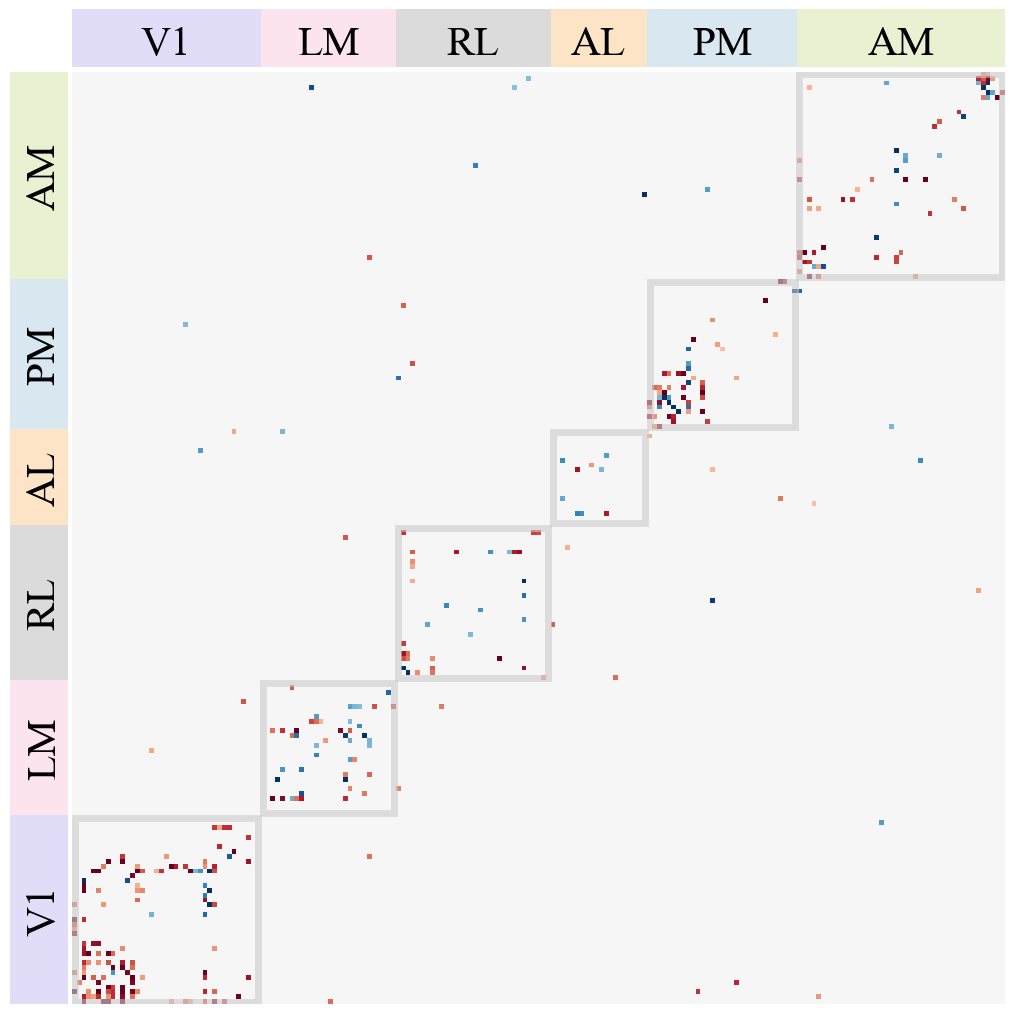

In [4]:
###################### plot connectivity matrix from left to right, from bottom to up
ratio = 15
plot_connectivity_matrix_annotation(G_ccg_dict, active_area_dict, session_ind, stimulus_ind, ccg_zscore, ccg_value, weight='weight', ratio=ratio)
plot_connectivity_matrix_annotation(G_ccg_dict, active_area_dict, session_ind, stimulus_ind, ccg_zscore, ccg_value, weight=None, ratio=ratio)

# Plot Figure 1E

spontaneous
flash_dark
flash_light
drifting_gratings
static_gratings
natural_scenes
natural_movie_one
natural_movie_three


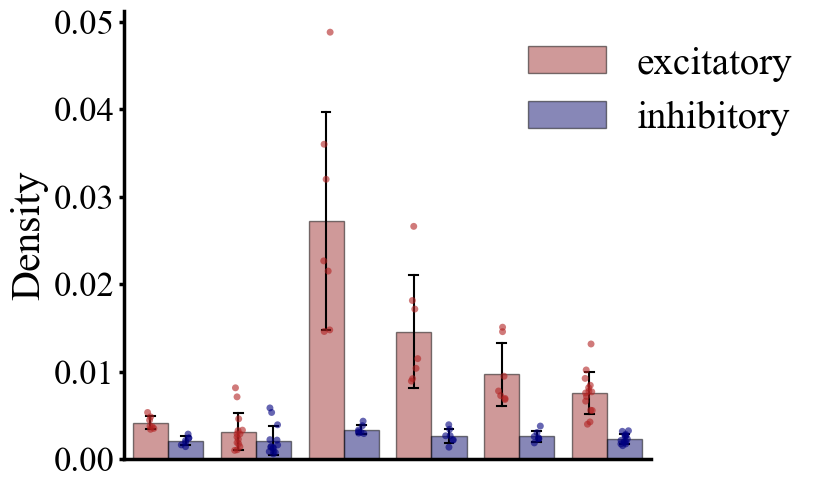

In [5]:
############################ new excitatory VS inhibitory connections
plot_new_ex_in_bar(S_ccg_dict, density=True)

# Plot Figure 1F

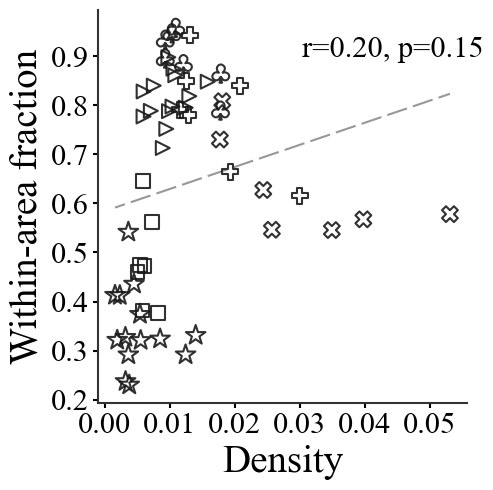

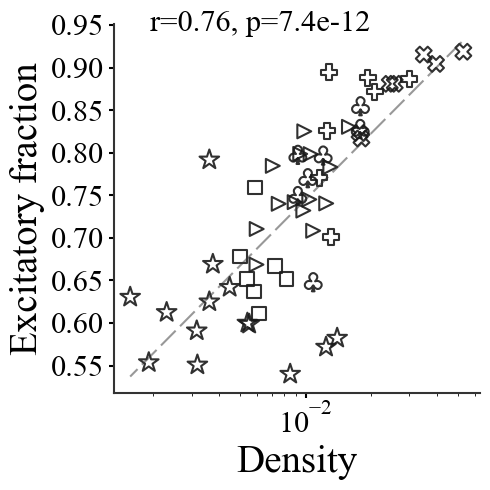

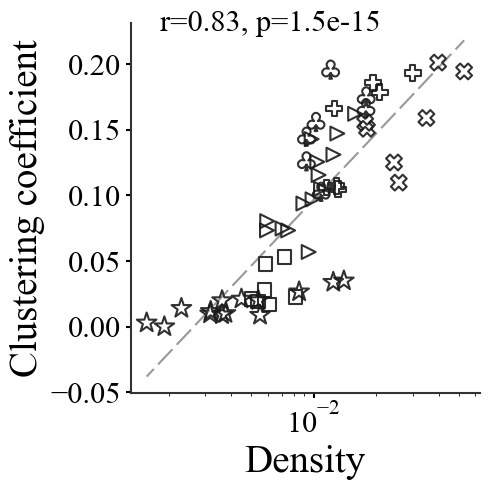

In [6]:
scatter_dataVSdensity(S_ccg_dict, area_dict, visual_regions, name='intra')
scatter_dataVSdensity(S_ccg_dict, area_dict, visual_regions, name='ex')
scatter_dataVSdensity(S_ccg_dict, area_dict, visual_regions, name='cluster')

# Load data for Figure 1G

In [9]:
start_time = time.time()
pairtype = 'all'
# pairtype = 'connected'
pos_connectionp_signalcorr_df, neg_connectionp_signalcorr_df, dis_connected_signalcorr_df = get_pos_neg_p_signalcorr(G_ccg_dict, active_area_dict, signal_correlation_dict, pairtype=pairtype)
print("--- %s minutes" % ((time.time() - start_time)/60))

719161530
750749662
754312389
755434585
756029989
791319847
797828357
Flashes
Drifting
gratings
Static
gratings
Natural
scenes
Natural
movies
--- 0.13536199728647869 minutes


# Plot Figure 1G

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


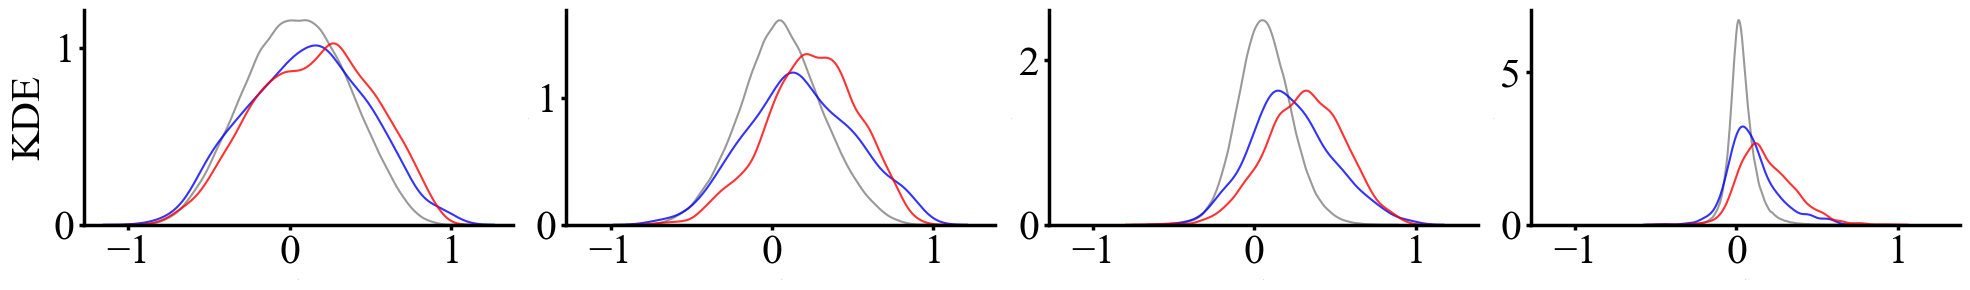

In [10]:
plot_pos_neg_signal_correlation_distri(pos_connectionp_signalcorr_df, neg_connectionp_signalcorr_df, dis_connected_signalcorr_df)